# This data set includes:

## 1. Import the Data

## 2. Clean the Data

## 3. Data Analysis

## 1. Import the Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [212]:
# Import Data Set
df= pd.read_csv(r"C:\Users\brook\OneDrive\Desktop\Car Accident Analysis\US_Accidents_Dec20_updated.csv", index_col = False)

In [195]:
# Create Path for data set
path = r"C:\Users\brook\OneDrive\Desktop"

## 2. Clean the Data

In [203]:
# Find missing percentages
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df)
missing_percentages

Number                   0.656615
Precipitation(in)        0.247232
Wind_Chill(F)            0.223733
Wind_Speed(mph)          0.064764
Humidity(%)              0.031254
Wind_Direction           0.029605
Visibility(mi)           0.029388
Temperature(F)           0.029319
Weather_Condition        0.028858
Pressure(in)             0.024281
Weather_Timestamp        0.021091
Airport_Code             0.002535
Timezone                 0.001101
Zipcode                  0.000466
Sunrise_Sunset           0.000066
Civil_Twilight           0.000066
Nautical_Twilight        0.000066
Astronomical_Twilight    0.000066
City                     0.000066
State                    0.000000
Crossing                 0.000000
Year                     0.000000
Date                     0.000000
Start Time               0.000000
Turning_Loop             0.000000
Traffic_Signal           0.000000
Traffic_Calming          0.000000
Stop                     0.000000
Station                  0.000000
Roundabout    

<AxesSubplot:>

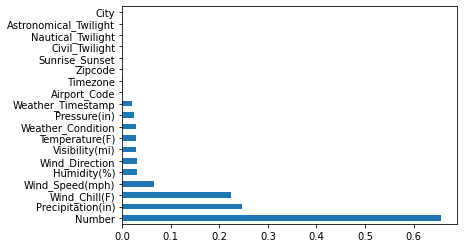

In [224]:
# Create bar graph of missing percentages
missing_percentages[missing_percentages != 0].plot(kind='barh')

## 3. Data Analysis

In [225]:
# Create cities_by_accident data set with cities and number of accidents per city
cities_by_accident = df.City.value_counts()

In [227]:
# Count how many cities are listed
cities = df.City.unique()
len(cities)

7995

In [228]:
# Display cities by accident
cities_by_accident

Miami            25584
Los Angeles      20472
Orlando          10019
Charlotte         9904
Dallas            9260
                 ...  
Washburn             1
Kintnersville        1
Vergennes            1
Lansford             1
Eastport             1
Name: City, Length: 7995, dtype: int64

In [229]:
# Display only to 500 cities
cities_by_accident[:500]

Miami           25584
Los Angeles     20472
Orlando         10019
Charlotte        9904
Dallas           9260
                ...  
Hastings          257
La Pine           257
Independence      257
Greenbelt         257
Chatsworth        257
Name: City, Length: 500, dtype: int64

<AxesSubplot:>

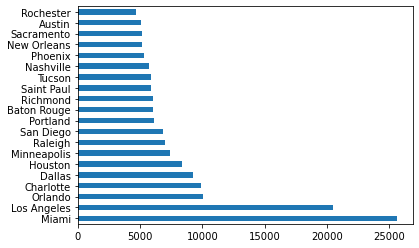

In [230]:
# Plot the top 20 cities
cities_by_accident[:20].plot(kind='barh')

In [231]:
# Create data set with states by number of accidents per state
states_by_accident = df.State.value_counts()

In [232]:
# Display the states_by_accident
states_by_accident

CA    215705
FL     98868
OR     34867
MN     33712
TX     32671
NY     32537
VA     31428
PA     31313
NC     27676
SC     21807
AZ     16074
MD     15951
LA     15150
TN     13800
NJ     13573
IL     10943
GA     10672
MI      9768
UT      9722
OH      7697
CT      7388
CO      6713
WA      6543
AL      6302
MO      5494
IN      3726
OK      3496
MA      2947
AR      2907
MT      2734
DC      2467
IA      2397
ID      2232
KY      2105
KS      1732
WV      1330
WI      1282
DE      1146
MS      1132
NE       968
RI       843
NH       674
NV       603
NM       591
ND       378
ME       309
SD       161
VT        92
WY        62
Name: State, dtype: int64

In [233]:
# Change start time to date frame
df.Start_Time = pd.to_datetime(df.Start_Time)

ParserError: hour must be in 0..23: 35:54.0

C:\Users\brook\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

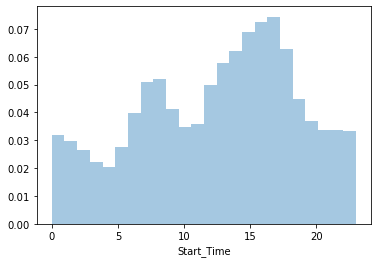

In [143]:
# Import seaborn and plot hour of day

import seaborn as sns

sns.distplot(df.Start_Time.dt.hour, bins=24, kde=False, norm_hist=True)

<AxesSubplot:xlabel='Start_Time'>

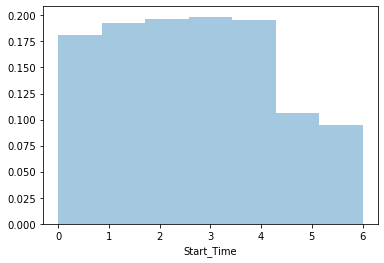

In [144]:
# Plot day of week

sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True)

In [145]:
#Create Hour dataset with hour with number of accidents per each hour

Hour = df.Start_Time.dt.hour.value_counts()



In [146]:
# Display Hour

Hour

17    108011
16    105559
15    100074
18     91413
14     90162
13     83700
8      75802
7      73938
12     72283
19     65190
9      59744
6      57859
20     53515
11     51884
10     50442
22     49156
21     48988
23     48226
0      46125
1      43434
5      40105
2      38801
3      32175
4      29478
Name: Start_Time, dtype: int64

In [147]:
# Create data set with day of the week with number of accidents

Day = df.Start_Time.dt.dayofweek.value_counts()

In [148]:
# Display Day

Day

3    258036
2    255775
4    254127
1    250900
0    235831
5    137620
6    123775
Name: Start_Time, dtype: int64

In [149]:
# Create data set with month with number of accidents

Month = df.Start_Time.dt.month.value_counts()

In [150]:
# Display Month

Month

12    277489
11    222031
10    181074
9     122906
6     113048
5     108195
4     107007
3      96802
1      88540
2      82419
8      62903
7      53650
Name: Start_Time, dtype: int64

In [151]:
# Create data set with year with number of accidents

Year = df.Start_Time.dt.year.value_counts()

In [152]:
#Display Year

Year

2020    787932
2019    261772
2017    170099
2018    166936
2016    129325
Name: Start_Time, dtype: int64

In [153]:
# Create data set with severity with number of accidents
# Display Severity

Severity = df.Severity.value_counts()
Severity

2    1212382
3     161052
4     114452
1      28178
Name: Severity, dtype: int64

In [154]:
# Organize weather types by severity

weather = df.iloc[:, 20:30]
weather['Severity'] = df['Severity']
weather.head()

,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Severity
0,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,3
1,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,2
2,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,2
3,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,2
4,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,2


In [208]:
# Create a weather top 20 data set

Weather_top_20 = weather.value_counts()

In [209]:
# Display Weather_top_20

Weather_top_20.head(20)

Weather_Timestamp    Temperature(F)  Wind_Chill(F)  Humidity(%)  Pressure(in)  Visibility(mi)  Wind_Direction  Wind_Speed(mph)  Precipitation(in)  Weather_Condition      Severity
2020-12-16 13:53:00  81.0            81.0           74.0         29.91         10.0            S               10.0             0.0                Mostly Cloudy          2           122
2020-12-18 14:53:00  72.0            72.0           55.0         30.16         10.0            NE              12.0             0.0                Fair                   2           121
2020-12-09 12:53:00  62.0            62.0           53.0         30.17         10.0            NNW             16.0             0.0                Fair                   2            97
2020-09-30 12:53:00  90.0            90.0           52.0         29.93         10.0            SSE             3.0              0.0                Partly Cloudy          2            94
2020-12-01 13:53:00  64.0            64.0           56.0         30.10       

In [210]:
# Group weather by severity

weather.groupby(Severity)

In [211]:
# Display weather

weather.head(20)

,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Severity
0,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,3
1,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,2
2,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,2
3,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,2
4,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,2
5,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,3
6,2016-02-08 08:16:00,35.6,29.2,100.0,29.66,10.0,WSW,8.1,NaN,Overcast,2
7,2016-02-08 08:16:00,35.6,29.2,100.0,29.66,10.0,WSW,8.1,NaN,Overcast,2
8,2016-02-08 08:18:00,33.8,NaN,100.0,29.63,3.0,SW,2.3,NaN,Mostly Cloudy,2
9,2016-02-08 11:51:00,33.1,30.0,92.0,29.63,0.5,SW,3.5,0.08,Snow,2


In [156]:
# Look only at the data with the road conditions

location = df.iloc[:, 30:43]
location.head()

,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


In [157]:
#  Export data into prepared data as csv

df.to_csv(os.path.join(path, 'US_Accidents_Dec20_updated_March3.csv'))
cities_by_accident.to_csv(os.path.join(path, 'Cities by Number of Accidents.csv'))                           
Hour.to_csv(os.path.join(path, 'Hour of Accident.csv'))
Day.to_csv(os.path.join(path, 'Day of Accident.csv'))
Month.to_csv(os.path.join(path, 'Month of Accident.csv'))
Year.to_csv(os.path.join(path, 'Year of Accident.csv'))
Severity.to_csv(os.path.join(path, 'Severity of Accident.csv'))
weather.to_csv(os.path.join(path, 'Weather during Accident.csv'))
location.to_csv(os.path.join(path, 'Location of Accident.csv'))

In [158]:
# Export states_by_accident as csv

states_by_accident.to_csv(os.path.join(path, 'States by Accident.csv'))

In [159]:
# Import census data

Population= pd.read_csv(r"C:\Users\brook\OneDrive\Desktop\us2021census.csv", index_col = False)





In [160]:
# Display Population 20 rows

Population.head(20)

,City,State,Type,Counties,Population,Latitude,Longitude
0,New York,NY,City,Bronx;Richmond;New York;Kings;Queens,8804190,40.714,-74.007
1,Los Angeles,CA,City,Los Angeles,3898747,34.052,-118.243
2,Chicago,IL,City,Cook;DuPage,2746388,41.882,-87.628
3,Houston,TX,City,Harris;Fort Bend;Montgomery,2304580,29.760,-95.363
4,Phoenix,AZ,City,Maricopa,1608139,33.448,-112.074
5,Philadelphia,PA,City,Philadelphia,1603797,39.952,-75.164
6,San Antonio,TX,City,Bexar,1434625,29.423,-98.490
7,San Diego,CA,City,San Diego,1386932,32.716,-117.165
8,Dallas,TX,City,Rockwall;Denton;Kaufman;Dallas;Collin,1304379,32.781,-96.797
9,San Jose,CA,City,Santa Clara,1013240,37.336,-121.891


In [161]:
# Create a data set with columns City and Population

Population_city = Population[["City", "Population"]]

In [162]:
# Display data set

Population_city.head(30)

,City,Population
0,New York,8804190
1,Los Angeles,3898747
2,Chicago,2746388
3,Houston,2304580
4,Phoenix,1608139
5,Philadelphia,1603797
6,San Antonio,1434625
7,San Diego,1386932
8,Dallas,1304379
9,San Jose,1013240


In [163]:
# Create a data set with columns State and Population

Population_state = Population[["State", "Population"]]

In [164]:
# Display data set

Population_state

,State,Population
0,NY,8804190
1,CA,3898747
2,IL,2746388
3,TX,2304580
4,AZ,1608139
...,...,...
21392,OK,0
21393,MO,0
21394,TX,0
21395,KY,0


In [165]:
# Export data sets as csv

Population_city.to_csv(os.path.join(path, 'Population_City.csv'))
Population_state.to_csv(os.path.join(path, 'Population_State.csv'))

In [166]:
# Create data set with Start Time and Severity

Hour_Severity = df[["Start_Time", "Severity"]]

In [167]:
# Display first 20 rows

Hour_Severity.head(20)

,Start_Time,Severity
0,2016-02-08 00:37:08,3
1,2016-02-08 05:56:20,2
2,2016-02-08 06:15:39,2
3,2016-02-08 06:15:39,2
4,2016-02-08 06:51:45,2
5,2016-02-08 07:53:43,3
6,2016-02-08 08:16:57,2
7,2016-02-08 08:16:57,2
8,2016-02-08 08:15:41,2
9,2016-02-08 11:51:46,2


In [168]:
# Create Hour column from start time

Hour_Severity['Hour'] = df.Start_Time.dt.hour

C:\Users\brook\AppData\Local\Temp/ipykernel_8844/2232144914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Hour_Severity['Hour'] = df.Start_Time.dt.hour


In [223]:
# Display

Hour_Severity

,Start_Time,Severity,Hour
0,2016-02-08 00:37:08,3,0
1,2016-02-08 05:56:20,2,5
2,2016-02-08 06:15:39,2,6
3,2016-02-08 06:15:39,2,6
4,2016-02-08 06:51:45,2,6
...,...,...,...
1516059,2019-08-23 18:03:25,2,18
1516060,2019-08-23 19:11:30,2,19
1516061,2019-08-23 19:00:21,2,19
1516062,2019-08-23 19:00:21,2,19


In [170]:
# Export data set

Hour_Severity.to_csv(os.path.join(path, 'Severity by hour.csv'))


In [171]:
# Show columns in Population data set

Population.columns


Index(['City', 'State', 'Type', 'Counties', 'Population', 'Latitude',
       'Longitude'],
      dtype='object')

In [219]:
# Display first 5 rows in Population data set

Population.head(5)

,City,State,Type,Counties,Population,Latitude,Longitude
0,New York,NY,City,Bronx;Richmond;New York;Kings;Queens,8804190,40.714,-74.007
1,Los Angeles,CA,City,Los Angeles,3898747,34.052,-118.243
2,Chicago,IL,City,Cook;DuPage,2746388,41.882,-87.628
3,Houston,TX,City,Harris;Fort Bend;Montgomery,2304580,29.760,-95.363
4,Phoenix,AZ,City,Maricopa,1608139,33.448,-112.074


In [218]:
# Display columns 

states_by_accident.columns

Index(['State', 'Number of Accidents'], dtype='object')

In [217]:
# Show first 5 rows

states_by_accident.head(5)

,State,Number of Accidents
0,CA,448833
1,FL,153007
2,OR,87484
3,TX,75142
4,NY,60974


In [216]:
# Export data set

states_by_accident = pd.read_csv(r"C:\Users\brook\OneDrive\Desktop\Car Accident Analysis\States by Accident.csv", index_col = False)

In [220]:
# Inner merge columns with State key

merged_inner = pd.merge(left=Population, right=states_by_accident, left_on='State', right_on='State')

In [221]:
# Display columns with merged data sets

merged_inner.columns

Index(['City', 'State', 'Type', 'Counties', 'Population', 'Latitude',
       'Longitude', 'Number of Accidents'],
      dtype='object')

In [222]:
# Export data set

merged_inner.to_csv(os.path.join(path, 'State Population vs. Accidents.csv'))